<a href="https://colab.research.google.com/github/muregad/Machine-Learning-NETW-1013-/blob/main/GUC_KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv("drive/MyDrive/Classified Data")
df_np = df.to_numpy()

In [11]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [12]:
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [15]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)
conf_matrix

array([[232,  18],
       [ 26, 224]])

***Print Misclassification error rate***

In [27]:
print(100*np.sum(y_test != pred)/y_test.shape)

[8.8]


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

boxplots = []
means = []
for k in range (1 , 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  boxplots.append(1 - scores)
  means.append(np.mean(1 - scores))

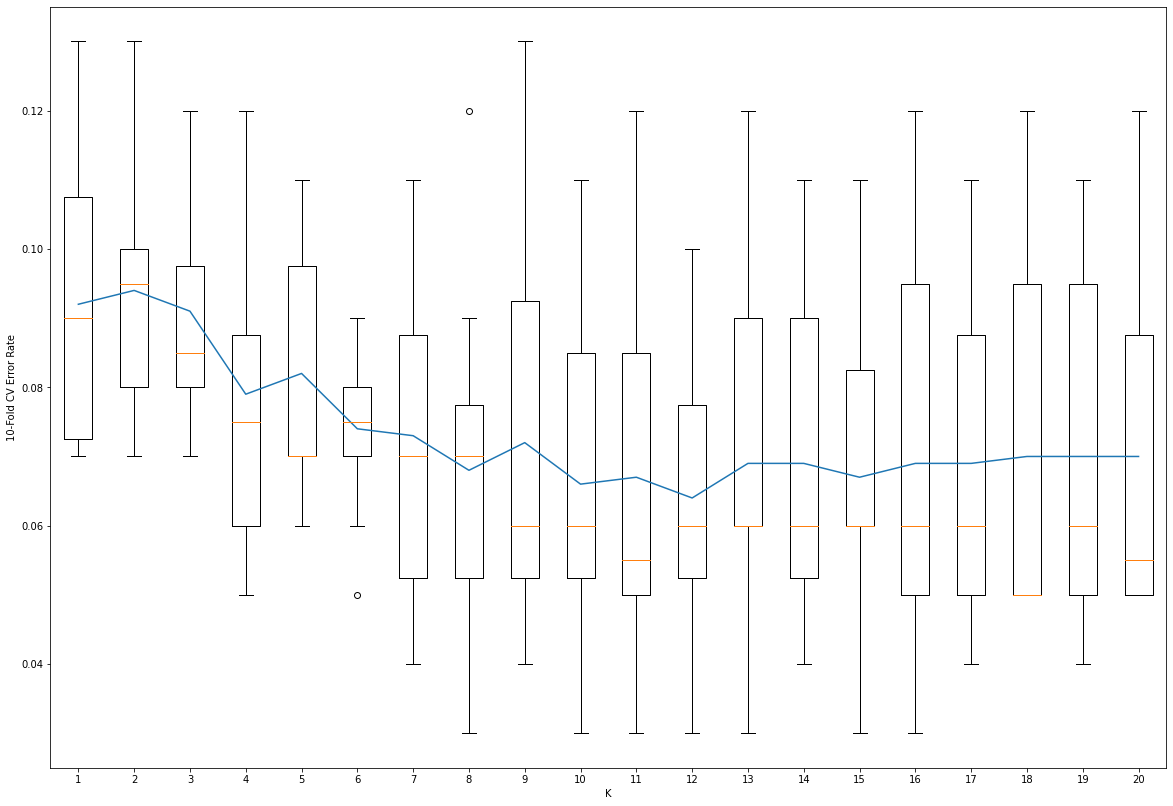

In [48]:
fig = plt.figure(figsize =(20, 14))
plt.boxplot(boxplots)
plt.plot(np.arange(1 , 21), means)
plt.xlabel("K")
plt.ylabel("10-Fold CV Error Rate")
plt.show()

In [57]:
best_k = np.argmin(means) + 1
best_accuracy = 1 - means[best_k - 1]
best_k, best_accuracy

(12, 0.9359999999999999)